# Importing the libraries

In [1]:
#importing the libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Analysis on clean dataset

In [2]:
#loading the clean dataset

student_clean_data = pd.read_csv('D:/MPS - Analytics/ALY 6080 - Integrated Exp Learning/STUDENT RISK ANALYSIS - CGPA PREDICTION/Student Risk Analysis_CleanedData.csv')

In [4]:
student_clean_data

,SR NO.,10TH - SCHOOL NAME,10TH - BOARD NAME,12TH / DIPLOMA - BOARD,12TH / DIPLOMA - COLLEGE NAME,AADHAR CARD NO,ALTERNATE E- MAIL ID,BRANCH,CATEGORY,DATE OF BIRTH,...,12TH / DIPLOMA -YEAR OF PASSING,B.TECH %,B.TECH CGPA,EMERGENCY CONTACT NO,NO OF ACTIVE BACKLOGS,NO OF PASSIVE BACKLOGS,S.NO,STUDENT MOBILE NO,STUDENT POSTAL PINCODE,ELIGIBLE/NOT ELIGIBLE
0,0,GREENWOOD HIGH SCHOOL,CBSE,BOI,NARAYANA JUNIOR COLLEGE,6.85E+11,akhilaakhi771@gmail.com,CSE,OC,5/6/2000,...,2018.0,87.1,9.21,9.866509e+09,0,0,1,9100584909,506002.0,ELIGIBLE
1,1,MAHARISHI VIDYA MANDIR,CBSE,BOI,SRI CHAITANYA JUNIOR KALASALA,6128 7852 9742,akshithaadepu777@gmail.com,CSE,BC-B,8/7/2000,...,2018.0,83.3,8.83,9.000433e+09,0,0,2,7675926657,500072.0,ELIGIBLE
2,2,D.A.V PUBLIC SCHOOL,CBSE,BOI,SRI CHAITANYA JUNIOR KALASALA,7884 5831 1412,y.yogalakshmi@gmail.com,CSE,OC,12/6/2000,...,2018.0,89.0,9.40,9.393117e+09,0,0,3,8374903190,500072.0,ELIGIBLE
3,3,Sri Chaitanya School,SSC,BOI,Sri Chaitanya,3.78E+11,yasaswiniyashu10@gmail.com,CSE,OC,10/30/2000,...,2018.0,88.4,9.34,9.849104e+09,0,0,4,9381763837,500090.0,ELIGIBLE
4,4,St.Joseph’s Public School,ICSE,BOI,Sri Chaitanya Junior Kalasala,NaN,sankranthiammu44@gmail.com,CSE,OC,4/27/2001,...,2018.0,86.6,9.16,9.492433e+09,0,0,5,9100080068,500085.0,ELIGIBLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1294,Dav Public School,CBSE,BOI,Sri Chaitanya Junior Collage,NaN,freakysanjeev110@gmail.com,MECH,OC,12/27/2000,...,2018.0,0.0,0.00,9.963701e+09,1,0,35,6302940286,500072.0,NOT ELIGIBLE
1295,1295,Little flower high school,SSC,BOI,Sri venkateshwara junior college,6.19E+11,anjalithurkapally@gmail.com,MECH,BC-D,5/12/2001,...,2018.0,0.0,0.00,6.304637e+09,0,0,36,7799873613,509209.0,NOT ELIGIBLE
1296,1296,VISWA BHARATI HIGH SCHOOL,SSC,BOI,VELOCIITY JUNIOR COLLEGE,7.77E+11,anilhanuman2000@outlook.com,MECH,BC-B,1/5/2001,...,2018.0,0.0,0.00,9.010300e+09,1,0,37,9701387008,500085.0,NOT ELIGIBLE
1297,1297,ST JOSEPH’S HIGH SCHOOL,SSC,BOI,NARAYANA JUNIOR COLLEGE,9.05E+11,YSUJAINATH@YAHOO.COM,MECH,BC-C,7/31/1999,...,2017.0,59.4,6.44,9.849232e+09,0,1,38,9030215323,508202.0,NOT ELIGIBLE


In [5]:
#data types

student_clean_data.dtypes

SR NO.                                int64
10TH -  SCHOOL NAME                  object
10TH - BOARD NAME                    object
12TH / DIPLOMA - BOARD               object
12TH / DIPLOMA - COLLEGE NAME        object
AADHAR CARD NO                       object
ALTERNATE E- MAIL ID                 object
BRANCH                               object
CATEGORY                             object
DATE OF BIRTH                        object
E- MAIL ID                           object
ENTRANCE TAKEN                       object
GENDER                               object
INTERNSHIP                           object
PAN NUMBER                           object
RANK OF ENTRANCE TEST                object
ROLL NO                              object
SEAT TYPE                            object
STUDENT CITY                         object
STUDENT DISTRICT                     object
STUDENT FIRST NAME                   object
STUDENT FULL NAME                    object
STUDENT LAST NAME               

In [6]:
#data columns

student_clean_data.columns

Index(['SR NO.', '10TH -  SCHOOL NAME ', '10TH - BOARD NAME ',
       '12TH / DIPLOMA - BOARD ', '12TH / DIPLOMA - COLLEGE NAME ',
       'AADHAR CARD NO ', 'ALTERNATE E- MAIL ID ', 'BRANCH ', 'CATEGORY ',
       'DATE OF BIRTH ', 'E- MAIL ID ', 'ENTRANCE TAKEN ', 'GENDER ',
       'INTERNSHIP', 'PAN NUMBER ', 'RANK OF ENTRANCE TEST ', 'ROLL NO ',
       'SEAT TYPE ', 'STUDENT CITY ', 'STUDENT DISTRICT ',
       'STUDENT FIRST NAME ', 'STUDENT FULL NAME ', 'STUDENT LAST NAME ',
       'STUDENT PERMANENT ADDRESS ', 'STUDENT SURNAME ',
       '10TH - YEAR OF PASSING ', '10TH CGPA ', '12TH  / DIP % ',
       '12TH / DIPLOMA -YEAR OF PASSING ', 'B.TECH  % ', 'B.TECH  CGPA ',
       'EMERGENCY CONTACT NO ', 'NO OF ACTIVE BACKLOGS ',
       'NO OF PASSIVE BACKLOGS ', 'S.NO ', 'STUDENT MOBILE NO ',
       'STUDENT POSTAL PINCODE ', 'ELIGIBLE/NOT ELIGIBLE'],
      dtype='object')

# Data Cleaning 

In [3]:
#data cleaning for column 'Entrance Taken'

student_clean_data['ENTRANCE TAKEN '] = student_clean_data['ENTRANCE TAKEN '].replace(['.', '-', '___', "  ", "Nil", "No", "Nothing", "No entrance exam", "No exam has been written", "No rank"], 'No Exam/No Rank')
student_clean_data['ENTRANCE TAKEN '] = student_clean_data['ENTRANCE TAKEN '].replace(["Amritha vishwa vidyaPeetham University"], 'University Exam')
student_clean_data['ENTRANCE TAKEN '] = student_clean_data['ENTRANCE TAKEN '].fillna("No Exam/No Rank")
student_clean_data['ENTRANCE TAKEN '] = student_clean_data['ENTRANCE TAKEN '].replace(['NRI', 'nri', 'Nri'], 'NRI')
student_clean_data['ENTRANCE TAKEN '] = student_clean_data['ENTRANCE TAKEN '].replace(['Spot admissions'], 'Spot admission')
student_clean_data['ENTRANCE TAKEN '] = student_clean_data['ENTRANCE TAKEN '].replace(['In ipe','Ip', 'Ip marks- based on 12th marks'], 'IP')

print("Replace Successful!")


Replace Successful!


In [4]:
#data cleaning for column 'Seat Type'

student_clean_data['SEAT TYPE '] = student_clean_data['SEAT TYPE '].replace(["CONVENER (EAMCET)"], 'EAMCET')
student_clean_data['SEAT TYPE '] = student_clean_data['SEAT TYPE '].replace(["CONVENER (E-CET)"], 'E-CET')

print("Replace Successful!")

Replace Successful!


In [5]:
#data cleaning for column 'Rank of Entrance Exam'

student_clean_data['RANK OF ENTRANCE TEST '] = student_clean_data['RANK OF ENTRANCE TEST '].replace([" ", "No", "Na", "NalA", "Exam has no been written", "na", "No Rank"], '0')
student_clean_data['RANK OF ENTRANCE TEST '] = student_clean_data['RANK OF ENTRANCE TEST '].fillna(0)
student_clean_data['RANK OF ENTRANCE TEST '] = student_clean_data['RANK OF ENTRANCE TEST '].astype(str).str.replace(",", "").str.replace(".", "").str.replace("k", "000").str.replace("(", "").str.replace(")","").str.replace(" ", "").str.replace("16000-","")
student_clean_data['RANK OF ENTRANCE TEST '] = student_clean_data['RANK OF ENTRANCE TEST '].str.replace("186/ran000-", "").str.replace("AIR", "").str.replace("8605-OBCNCL", "").str.replace("BRANCHRANK410INTEGRATEDRANK", "").str.replace("-CRL","").str.replace("BRANCHRANK2300INTEGRATEDRANK","").str.replace("Examhasnobeenwritten","0")
student_clean_data['RANK OF ENTRANCE TEST '] = student_clean_data['RANK OF ENTRANCE TEST '].str.replace("36thbranchran000", "0").str.replace("666branchran000", "0").str.replace("BRANCH74","0").str.replace("28branchran000","0").str.replace("JEEMAINSRANK-","").str.replace("ALLINDIA","").str.replace("allindia","")
student_clean_data['RANK OF ENTRANCE TEST '] = student_clean_data['RANK OF ENTRANCE TEST '].str.replace("197branch", "").str.replace("Integrated", "").str.replace("23branchran000and208ran000","0").str.replace("NalA","0").str.replace("Jeemains","0").str.replace("nan","0").str.replace("Branchran000-32integratedran000-","0")
student_clean_data['RANK OF ENTRANCE TEST '] = student_clean_data['RANK OF ENTRANCE TEST '].fillna(0)
student_clean_data['RANK OF ENTRANCE TEST '].astype("int")


average = student_clean_data['RANK OF ENTRANCE TEST '][student_clean_data['RANK OF ENTRANCE TEST ']!=0].median()
student_clean_data['RANK OF ENTRANCE TEST '] = student_clean_data['RANK OF ENTRANCE TEST '].replace(0, average)


print("Replace Successful!")

Replace Successful!


C:\Users\rramb\AppData\Local\Temp\ipykernel_28860\2310651488.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  student_clean_data['RANK OF ENTRANCE TEST '] = student_clean_data['RANK OF ENTRANCE TEST '].astype(str).str.replace(",", "").str.replace(".", "").str.replace("k", "000").str.replace("(", "").str.replace(")","").str.replace(" ", "").str.replace("16000-","")


In [6]:
#converting the datatypes

student_clean_data['RANK OF ENTRANCE TEST '] = pd.to_numeric(student_clean_data['RANK OF ENTRANCE TEST '])

In [12]:
student_clean_data.dtypes

SR NO.                                int64
10TH -  SCHOOL NAME                  object
10TH - BOARD NAME                    object
12TH / DIPLOMA - BOARD               object
12TH / DIPLOMA - COLLEGE NAME        object
AADHAR CARD NO                       object
ALTERNATE E- MAIL ID                 object
BRANCH                               object
CATEGORY                             object
DATE OF BIRTH                        object
E- MAIL ID                           object
ENTRANCE TAKEN                       object
GENDER                               object
INTERNSHIP                           object
PAN NUMBER                           object
RANK OF ENTRANCE TEST                 int64
ROLL NO                              object
SEAT TYPE                            object
STUDENT CITY                         object
STUDENT DISTRICT                     object
STUDENT FIRST NAME                   object
STUDENT FULL NAME                    object
STUDENT LAST NAME               

# Label Encoding for categorical parameters

In [7]:
#labeling the columns using Label Encoder

labelencoder = LabelEncoder()
student_clean_data['Entrance Taken Labels']  = labelencoder.fit_transform(student_clean_data["ENTRANCE TAKEN "])
student_clean_data['Seat Type Labels']  = labelencoder.fit_transform(student_clean_data["SEAT TYPE "])
student_clean_data['Gender Labels']  = labelencoder.fit_transform(student_clean_data["GENDER "])
student_clean_data['Branch Labels']  = labelencoder.fit_transform(student_clean_data["BRANCH "])
student_clean_data['Category Labels']  = labelencoder.fit_transform(student_clean_data["CATEGORY "])

In [8]:
student_clean_data

,SR NO.,10TH - SCHOOL NAME,10TH - BOARD NAME,12TH / DIPLOMA - BOARD,12TH / DIPLOMA - COLLEGE NAME,AADHAR CARD NO,ALTERNATE E- MAIL ID,BRANCH,CATEGORY,DATE OF BIRTH,...,NO OF PASSIVE BACKLOGS,S.NO,STUDENT MOBILE NO,STUDENT POSTAL PINCODE,ELIGIBLE/NOT ELIGIBLE,Entrance Taken Labels,Seat Type Labels,Gender Labels,Branch Labels,Category Labels
0,0,GREENWOOD HIGH SCHOOL,CBSE,BOI,NARAYANA JUNIOR COLLEGE,6.85E+11,akhilaakhi771@gmail.com,CSE,OC,5/6/2000,...,0,1,9100584909,506002.0,ELIGIBLE,5,3,0,2,9
1,1,MAHARISHI VIDYA MANDIR,CBSE,BOI,SRI CHAITANYA JUNIOR KALASALA,6128 7852 9742,akshithaadepu777@gmail.com,CSE,BC-B,8/7/2000,...,0,2,7675926657,500072.0,ELIGIBLE,5,2,0,2,1
2,2,D.A.V PUBLIC SCHOOL,CBSE,BOI,SRI CHAITANYA JUNIOR KALASALA,7884 5831 1412,y.yogalakshmi@gmail.com,CSE,OC,12/6/2000,...,0,3,8374903190,500072.0,ELIGIBLE,5,2,0,2,9
3,3,Sri Chaitanya School,SSC,BOI,Sri Chaitanya,3.78E+11,yasaswiniyashu10@gmail.com,CSE,OC,10/30/2000,...,0,4,9381763837,500090.0,ELIGIBLE,5,2,0,2,9
4,4,St.Joseph’s Public School,ICSE,BOI,Sri Chaitanya Junior Kalasala,NaN,sankranthiammu44@gmail.com,CSE,OC,4/27/2001,...,0,5,9100080068,500085.0,ELIGIBLE,5,2,0,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1294,Dav Public School,CBSE,BOI,Sri Chaitanya Junior Collage,NaN,freakysanjeev110@gmail.com,MECH,OC,12/27/2000,...,0,35,6302940286,500072.0,NOT ELIGIBLE,5,3,1,7,9
1295,1295,Little flower high school,SSC,BOI,Sri venkateshwara junior college,6.19E+11,anjalithurkapally@gmail.com,MECH,BC-D,5/12/2001,...,0,36,7799873613,509209.0,NOT ELIGIBLE,5,2,0,7,3
1296,1296,VISWA BHARATI HIGH SCHOOL,SSC,BOI,VELOCIITY JUNIOR COLLEGE,7.77E+11,anilhanuman2000@outlook.com,MECH,BC-B,1/5/2001,...,0,37,9701387008,500085.0,NOT ELIGIBLE,5,0,1,7,1
1297,1297,ST JOSEPH’S HIGH SCHOOL,SSC,BOI,NARAYANA JUNIOR COLLEGE,9.05E+11,YSUJAINATH@YAHOO.COM,MECH,BC-C,7/31/1999,...,1,38,9030215323,508202.0,NOT ELIGIBLE,5,2,1,7,2


# Correlation Plot 

Text(0.5, 1.0, 'Correlation Plot')

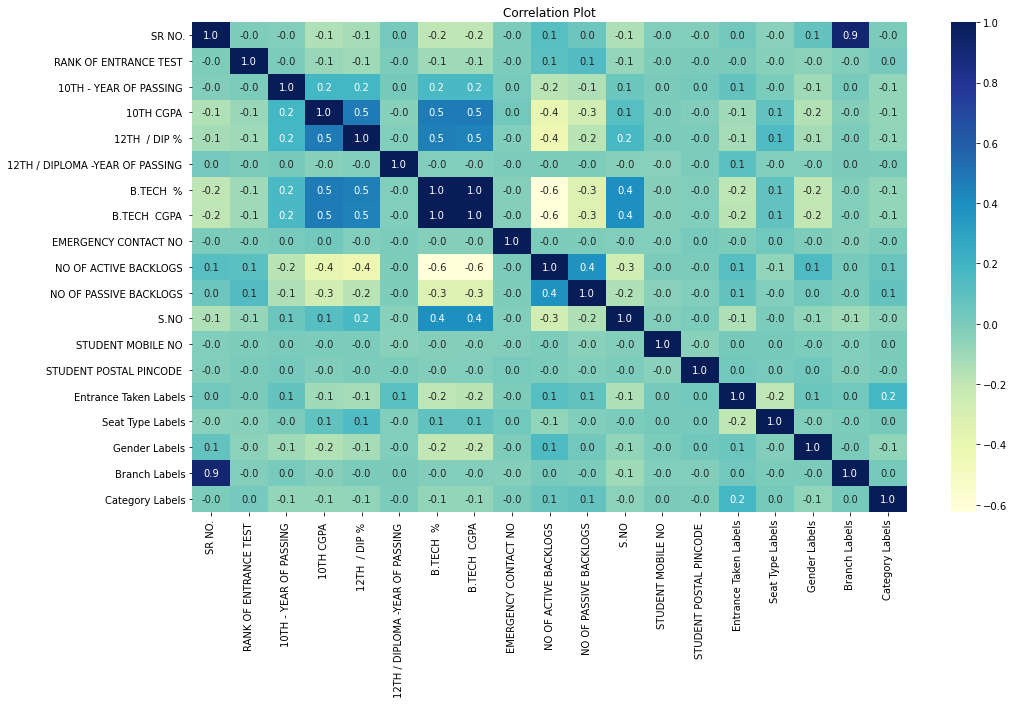

In [14]:
#plotting correlation matrix for checking correlation between variables and the eligibility labels

plt.figure(figsize = (16,9))
ax = plt.subplot()
sns.heatmap(student_clean_data.corr(),annot=True, fmt='.1f', ax=ax, cmap="YlGnBu")
ax.set_title('Correlation Plot')

In [15]:
#new dataframe for training model

new_student_clean_data = pd.DataFrame()

new_student_clean_data['10TH CGPA'] = student_clean_data['10TH CGPA ']
new_student_clean_data['12TH  / DIP %'] = student_clean_data['12TH  / DIP % ']
new_student_clean_data['Branch Labels'] = student_clean_data['Branch Labels']
new_student_clean_data['Gender Labels'] = student_clean_data['Gender Labels']
new_student_clean_data['Category Labels'] = student_clean_data['Category Labels']
new_student_clean_data['Entrance Taken Labels '] = student_clean_data['Entrance Taken Labels']
new_student_clean_data['Seat Type Labels '] = student_clean_data['Seat Type Labels']
new_student_clean_data['Rank of Entrance Test'] = student_clean_data['RANK OF ENTRANCE TEST ']

# Model Building

In [16]:
#extracting features and labels from the dataset

X = new_student_clean_data
Y = student_clean_data['B.TECH  CGPA ']

In [34]:
#splitting data into training and testing set

X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=42, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(1039, 8)
(260, 8)


# Linear Regression Model

In [35]:
#linear regression model

linear_regressionmodel = LinearRegression()
linear_regressionmodel.fit(X_train, y_train)

LinearRegression()

In [36]:
#predict the response for test dataset

predicted_value_LR = linear_regressionmodel.predict(X_test)

In [37]:
#accuracy of the LR for training and testing set

print('Accuracy of LR on training set: {:.2f}'.format(linear_regressionmodel.score(X_train, y_train)))
print('Accuracy of LR on test set:     {:.2f}'.format(linear_regressionmodel.score(X_test, y_test)))

result_LR = linear_regressionmodel.score(X_test, y_test)
result_LR = round(result_LR,3)
result_LR

Accuracy of LR on training set: 0.34
Accuracy of LR on test set:     0.24


0.238

In [51]:
#evaluating the model
print("Model Evaluation of Linear Regressor.")
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predicted_value_LR),1))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predicted_value_LR),1))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predicted_value_LR)),1))
print("R-Squared value:", metrics.r2_score(y_test, predicted_value_LR))

Model Evaluation of Linear Regressor.
Mean Absolute Error: 2.2
Mean Squared Error: 9.0
Root Mean Squared Error: 3.0
R-Squared value: 0.23762074811350875


# Decision Tree Regressor

In [45]:
#decision tree regressor

decisiontree_model = DecisionTreeRegressor(max_depth=5)
decisiontree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [46]:
#predict the result for the model

predicted_value_dt = decisiontree_model.predict(X_test)

In [47]:
#accuracy of the DT for training and testing set

print('Accuracy of Decision Tree Regressor model on training set: {:.2f}'.format(decisiontree_model.score(X_train, y_train)))
print('Accuracy of Decision Tree Regressor model on test set:     {:.2f}'.format(decisiontree_model.score(X_test, y_test)))

result_DT = decisiontree_model.score(X_test, y_test)
result_DT = round(result_DT,3)
result_DT

Accuracy of Decision Tree Regressor model on training set: 0.52
Accuracy of Decision Tree Regressor model on test set:     0.33


0.327

<AxesSubplot:>

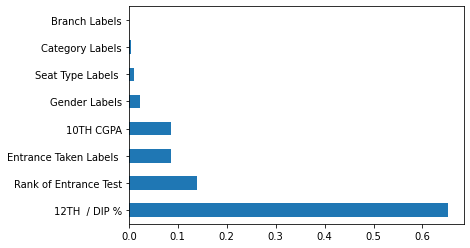

In [48]:
#feature importance for decision tree regressor

(pd.Series(decisiontree_model.feature_importances_, index=X.columns)
   .nlargest(8)
   .plot(kind='barh'))

In [49]:
#evaluating the model
print("Model Evaluation of Decision Tree Regressor.")
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predicted_value_dt),1))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predicted_value_dt),1))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predicted_value_dt)),1))
print("R-Squared value:", metrics.r2_score(y_test, predicted_value_dt))

Model Evaluation of Decision Tree Regressor.
Mean Absolute Error: 1.9
Mean Squared Error: 8.0
Root Mean Squared Error: 2.8
R-Squared value: 0.32680818883518215


# Random Forest Regressor

In [38]:
#random forest regressor

rf_model = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [39]:
#predict the response for test dataset

predicted_value_RF = rf_model.predict(X_test)

In [40]:
#accuracy of the RF Regressor model for training and testing set

print('Accuracy of RF Regressor on training set: {:.2f}'.format(rf_model.score(X_train, y_train)))
print('Accuracy of RF Regressor on test set:     {:.2f}'.format(rf_model.score(X_test, y_test)))

result_RF = rf_model.score(X_test, y_test)
result_RF = round(result_RF,3)
result_RF

Accuracy of RF Regressor on training set: 0.91
Accuracy of RF Regressor on test set:     0.38


0.382

<AxesSubplot:>

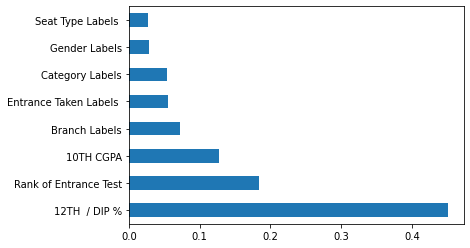

In [41]:
(pd.Series(rf_model.feature_importances_, index=X.columns)
   .nlargest(8)
   .plot(kind='barh'))

In [50]:
#evaluating the model
print("Model Evaluation of Random Forest Regressor.")
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predicted_value_RF),1))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predicted_value_RF),1))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predicted_value_RF)),1))
print("R-Squared value:", metrics.r2_score(y_test, predicted_value_RF))

Model Evaluation of Random Forest Regressor.
Mean Absolute Error: 1.9
Mean Squared Error: 7.3
Root Mean Squared Error: 2.7
R-Squared value: 0.38191383671404067


# Saving the model

In [52]:
#pickling the model

import pickle
pickle_out = open("Student_Classifier.pkl", "wb")
pickle.dump(rf_model, pickle_out)
pickle_out.close()

In [160]:
#saving the labeled data

#student_clean_data.to_csv('Student Risk Analysis_Labeled Data.csv')